In [2]:
from cryoS2Sdrop.analyze import *

PARENT_PATH = setup.PARENT_PATH

pd.options.display.float_format = "{:,.3f}".format
pd.set_option('display.max_columns', 50)

%matplotlib inline
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

# Tomophantom all versions image

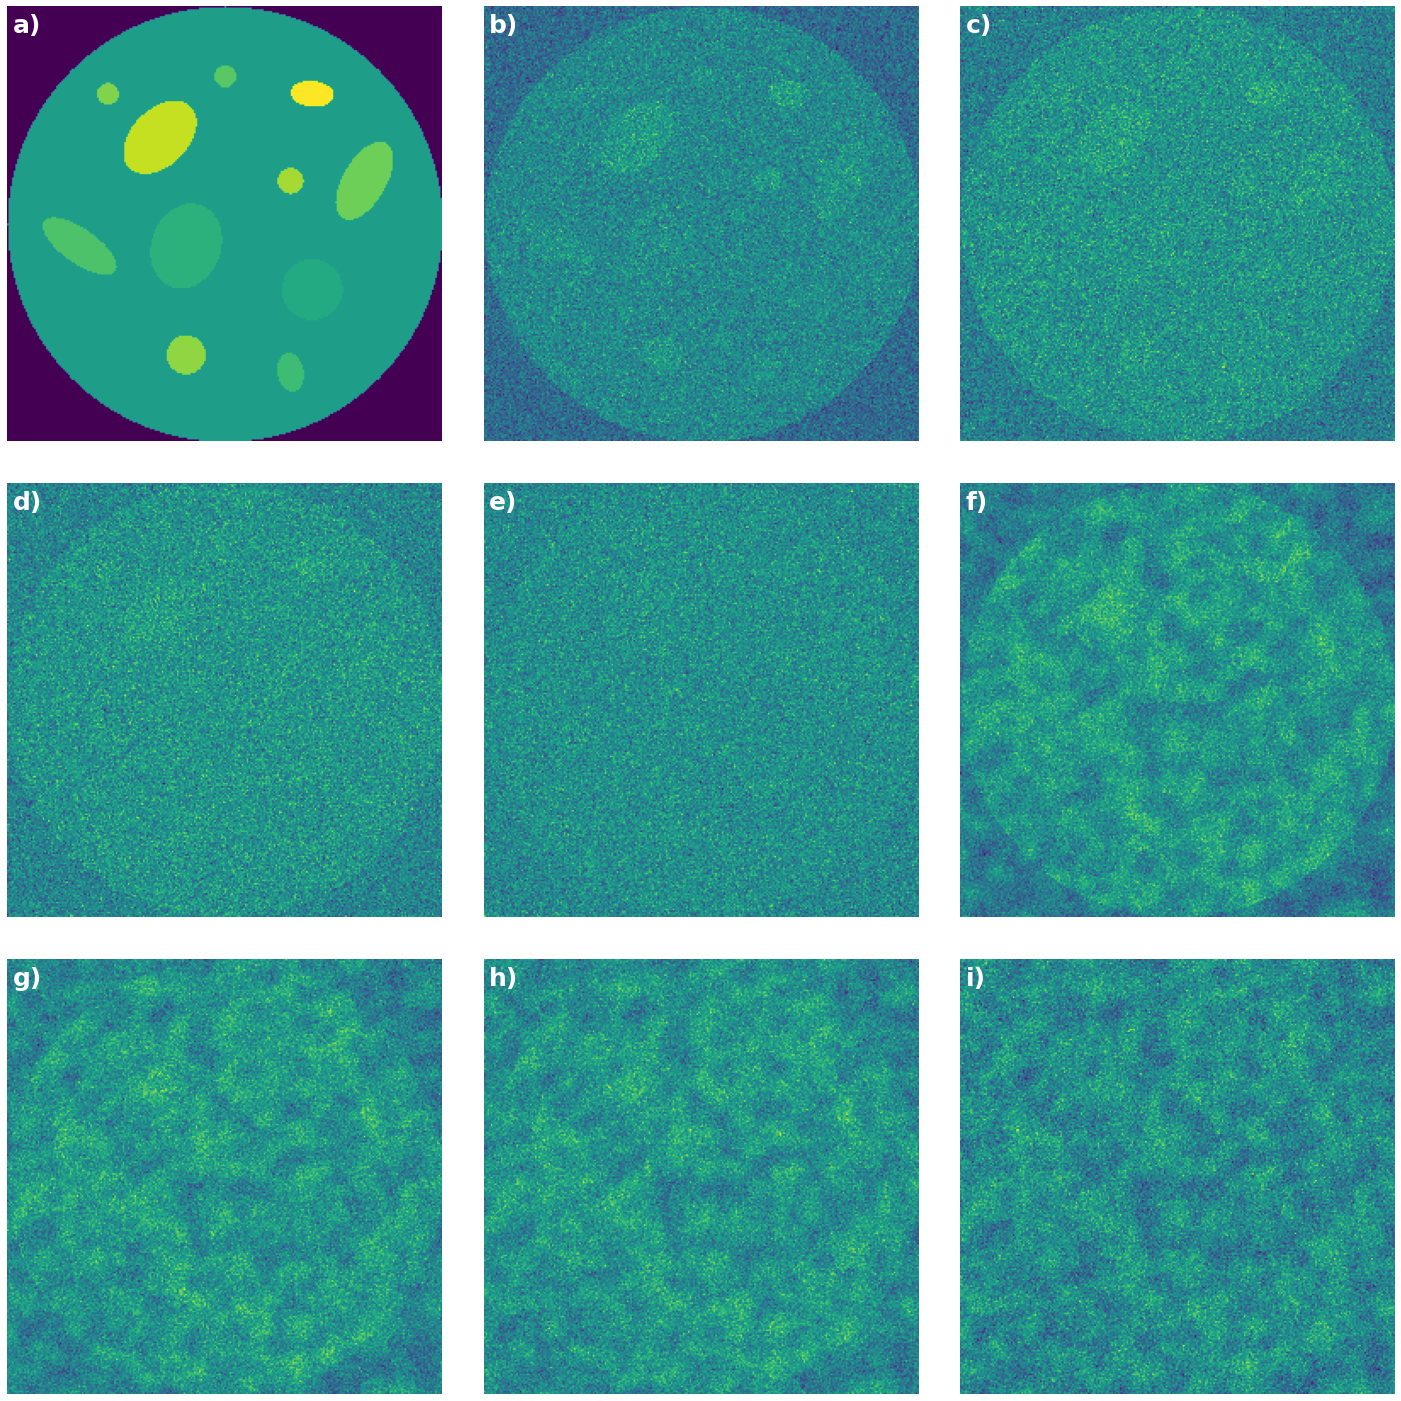

In [20]:
tomogram_list = [
    "tomoPhantom_model14",
    "tomoPhantom_model14_noisyGaussPoissVL",
    "tomoPhantom_model14_noisyGaussPoissL",
    "tomoPhantom_model14_noisyGaussPoissM",
    "tomoPhantom_model14_noisyGaussPoissH",
    "tomoPhantom_model14_noisyGaussPoissVL_Perlin",
    "tomoPhantom_model14_noisyGaussPoissL_Perlin",
    "tomoPhantom_model14_noisyGaussPoissM_Perlin",
    "tomoPhantom_model14_noisyGaussPoissH_Perlin"
]

fig, ax = plt.subplots(3, 3, figsize=(20, 20))
ax = ax.ravel()
plt.tight_layout()
n = 0
for tomo, my_ax in zip(tomogram_list, ax):
    data = read_array(os.path.join(PARENT_PATH, "data/S2SDenoising/dummy_tomograms/%s.mrc" %tomo))
    data = data[len(data)//2]
    my_ax.set_axis_off()
    my_ax.imshow(data)
    my_ax.text(0.0125, 0.94, string.ascii_lowercase[n]+')', transform=my_ax.transAxes, size=25, weight='bold', color='white')
    n+=1
    
plt.show()

# Tomophantom all models

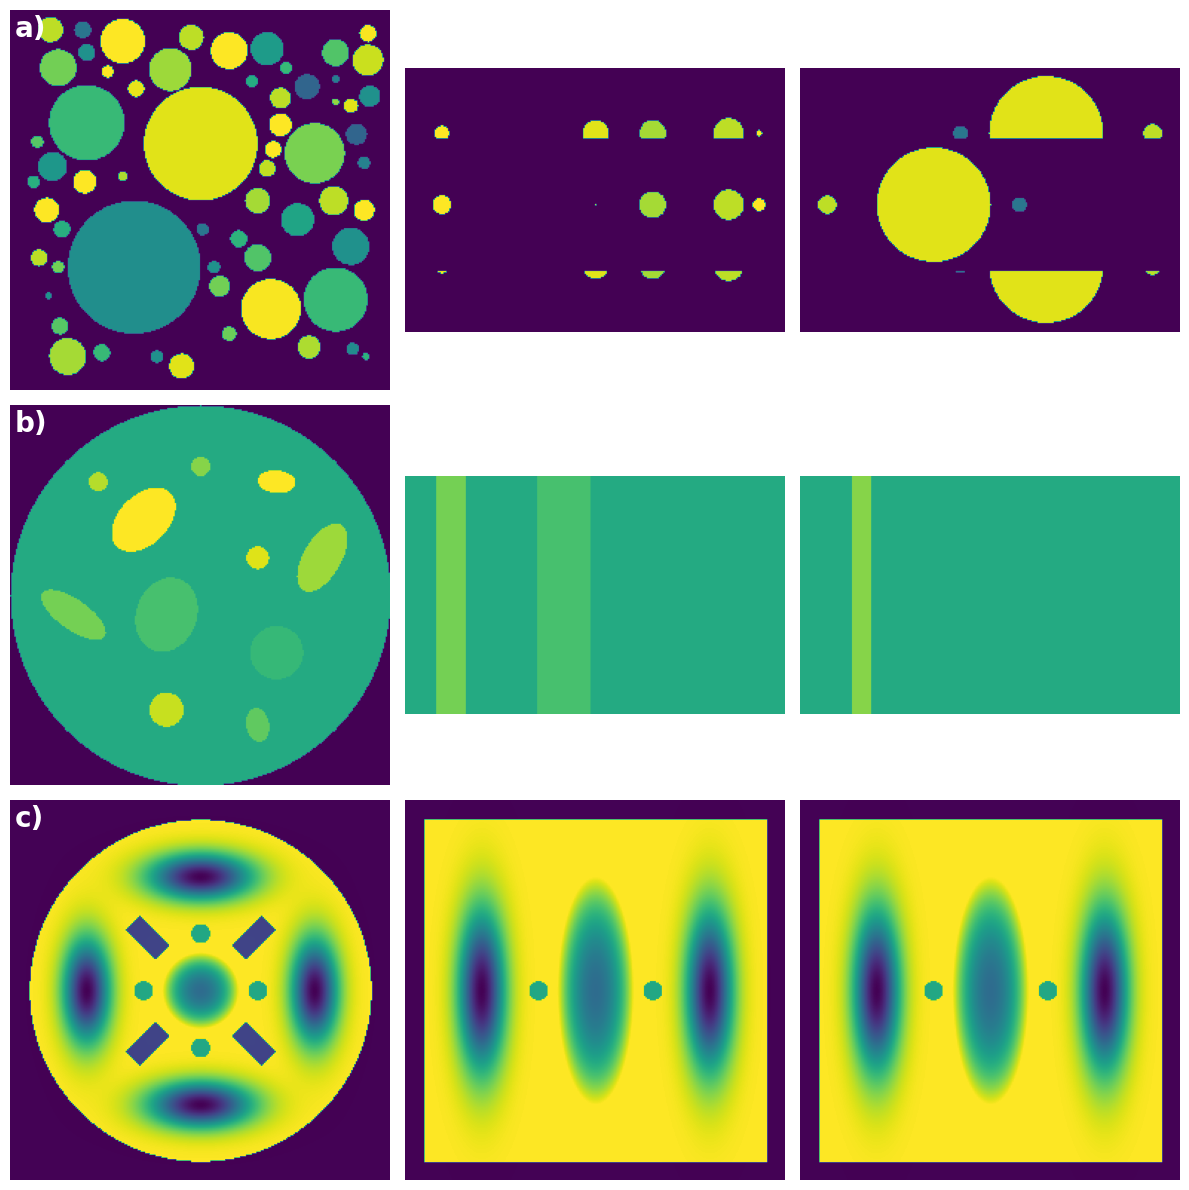

In [35]:
tomogram_list = [
    "tomoPhantom_model8",
    "tomoPhantom_model14",
    "tomoPhantom_model16"
]

fig, ax = plt.subplots(3, 3, figsize=(12, 12), dpi=100)
list(map(lambda axi: axi.set_axis_off(), ax.ravel()))

plt.tight_layout()
for i, tomo in enumerate(tomogram_list):
    
    data = read_array(os.path.join(PARENT_PATH, "data/S2SDenoising/dummy_tomograms/%s.mrc" %tomo))
    data = standardize(clip(data))
    data = scale(data)
    zidx, yidx, xidx = np.array(data.shape)//2
    
    my_ax = ax[i]
    
    my_ax[0].imshow(data[zidx], vmin=0, vmax=1)
    my_ax[1].imshow(data[:, yidx, :], vmin=0, vmax=1)
    my_ax[2].imshow(data[:, :, xidx], vmin=0, vmax=1)
    
    my_ax[0].text(0.0125, 0.93, string.ascii_lowercase[i]+')', transform=my_ax[0].transAxes, size=20, weight='bold', color='white')

    
plt.show()

# Metrics table from RealBernoulli experiments

In [ ]:
tomo_list = [
    'tomoPhantom_model8_noisyGaussPoissVL',
    'tomoPhantom_model8_noisyGaussPoissL',
    'tomoPhantom_model8_noisyGaussPoissM',
    'tomoPhantom_model8_noisyGaussPoissH',
    'tomoPhantom_model14_noisyGaussPoissVL',
    'tomoPhantom_model14_noisyGaussPoissL',
    'tomoPhantom_model14_noisyGaussPoissM',
    'tomoPhantom_model14_noisyGaussPoissH',
    'tomoPhantom_model16_noisyGaussPoissVL',
    'tomoPhantom_model16_noisyGaussPoissL',
    'tomoPhantom_model16_noisyGaussPoissM',
    'tomoPhantom_model16_noisyGaussPoissH'
            ]

data_log = []

for tomo in tqdm(tomo_list):
    logdir = 'data/S2SDenoising/model_logs/%s/realBernoulli_dropoutLevel_comparison/' %tomo
    logdir = os.path.join(PARENT_PATH, logdir)

    _data_log = logdir_to_dataframe(logdir, clip_values=True)
    data_log.append(_data_log)

data_log = pd.concat(data_log)
data_log = data_log.reset_index().drop('index', 1)
data_log.head()

In [13]:
df = data_log[['tomo_name', 'noise_level', 'p', 'full_tomo_ssim', 'n2v_ssim', 'full_tomo_psnr', 'n2v_psnr']]
df.columns = ['Model', 'Noise', 'p', 'SSIM', 'N2V SSIM', 'PSNR', 'N2V PSNR']
df = df.groupby(['Model', 'Noise', 'p'])['SSIM', 'N2V SSIM', 'PSNR', 'N2V PSNR'].mean()
# df.style.highlight_max(color = 'lightgreen', axis = 0)
df

SSIM  N2V SSIM   PSNR  N2V PSNR
Model     Noise                p                                   
blobs     Gauss(0.2) + Poisson 0.1 0.184     0.094 18.575    13.666
                               0.3 0.190     0.094 18.766    13.666
                               0.5 0.201     0.094 20.658    13.666
                               0.7 0.189     0.094 20.389    13.666
          Gauss(0.5) + Poisson 0.1 0.178     0.084 19.466    14.857
                               0.3 0.179     0.084 18.733    14.857
                               0.5 0.185     0.084 19.928    14.857
                               0.7 0.183     0.084 20.302    14.857
          Gauss(1.0) + Poisson 0.1 0.162     0.026 18.031     8.316
                               0.3 0.154     0.026 19.358     8.316
                               0.5 0.190     0.026 20.097     8.316
                               0.7 0.185     0.026 20.084     8.316
          Gauss(5.0) + Poisson 0.1 0.152     0.009 17.807     5.403
                               0.3 0.160     0.009 18.877     5.403
                               0.5 0.180     0.009 18.835     5.403
                               0.7 0.206     0.009 19.463     5.403
cell      Gauss(0.2) + Poisson 0.1 0.782     0.173 21.650    17.529
                               0.3 0.772     0.173 21.286    17.529
                               0.5 0.775     0.173 21.152    17.529
                               0.7 0.766     0.173 21.045    17.529
          Gauss(0.5) + Poisson 0.1 0.769     0.033 20.547    11.009
                               0.3 0.763     0.033 20.990    11.009
                               0.5 0.765     0.033 21.241    11.009
                               0.7 0.761     0.033 21.618    11.009
          Gauss(1.0) + Poisson 0.1 0.750     0.050 20.517    12.812
                               0.3 0.743     0.050 19.721    12.812
                               0.5 0.734     0.050 19.698    12.812
                               0.7 0.746     0.050 20.129    12.812
          Gauss(5.0) + Poisson 0.1 0.722     0.019 20.061     9.416
                               0.3 0.698     0.019 18.445     9.416
                               0.5 0.720     0.019 18.804     9.416
                               0.7 0.714     0.019 19.584     9.416
spaceship Gauss(0.2) + Poisson 0.1 0.643     0.560 17.506    21.192
                               0.3 0.649     0.560 18.743    21.192
                               0.5 0.658     0.560 20.491    21.192
                               0.7 0.661     0.560 21.609    21.192
          Gauss(0.5) + Poisson 0.1 0.623     0.391 16.422    18.651
                               0.3 0.633     0.391 17.903    18.651
                               0.5 0.641     0.391 19.597    18.651
                               0.7 0.643     0.391 19.970    18.651
          Gauss(1.0) + Poisson 0.1 0.613     0.241 16.917    14.510
                               0.3 0.617     0.241 17.977    14.510
                               0.5 0.622     0.241 19.513    14.510
                               0.7 0.627     0.241 19.948    14.510
          Gauss(5.0) + Poisson 0.1 0.593     0.012 17.163     5.623
                               0.3 0.606     0.012 18.098     5.623
                               0.5 0.613     0.012 18.856     5.623
                               0.7 0.586     0.012 19.088     5.623

In [14]:
print(df.to_latex())

\begin{tabular}{lllrrrr}
\toprule
          &                      &     &  SSIM &  N2V SSIM &   PSNR &  N2V PSNR \\
Model & Noise & p &       &           &        &           \\
\midrule
blobs & Gauss(0.2) + Poisson & 0.1 & 0.184 &     0.094 & 18.575 &    13.666 \\
          &                      & 0.3 & 0.190 &     0.094 & 18.766 &    13.666 \\
          &                      & 0.5 & 0.201 &     0.094 & 20.658 &    13.666 \\
          &                      & 0.7 & 0.189 &     0.094 & 20.389 &    13.666 \\
          & Gauss(0.5) + Poisson & 0.1 & 0.178 &     0.084 & 19.466 &    14.857 \\
          &                      & 0.3 & 0.179 &     0.084 & 18.733 &    14.857 \\
          &                      & 0.5 & 0.185 &     0.084 & 19.928 &    14.857 \\
          &                      & 0.7 & 0.183 &     0.084 & 20.302 &    14.857 \\
          & Gauss(1.0) + Poisson & 0.1 & 0.162 &     0.026 & 18.031 &     8.316 \\
          &                      & 0.3 & 0.154 &     0.026 & 19.358 &

In [90]:
df = data_log.groupby(['tomo_name', 'noise_level', 'p'])['full_tomo_ssim', 'full_tomo_psnr'].mean().reset_index()

df2 = data_log.groupby(['tomo_name', 'noise_level'])['n2v_ssim', 'n2v_psnr'].mean().reset_index()
df2['p'] = 'N2V Ref'
df2 = df2[['tomo_name', 'noise_level', 'p', 'n2v_ssim', 'n2v_psnr']]
df2.columns = ['tomo_name', 'noise_level', 'p', 'full_tomo_ssim', 'full_tomo_psnr']

df = pd.concat([df, df2])

cell
blobs
spaceship


Text(775.3131313131312, 0.5, '')

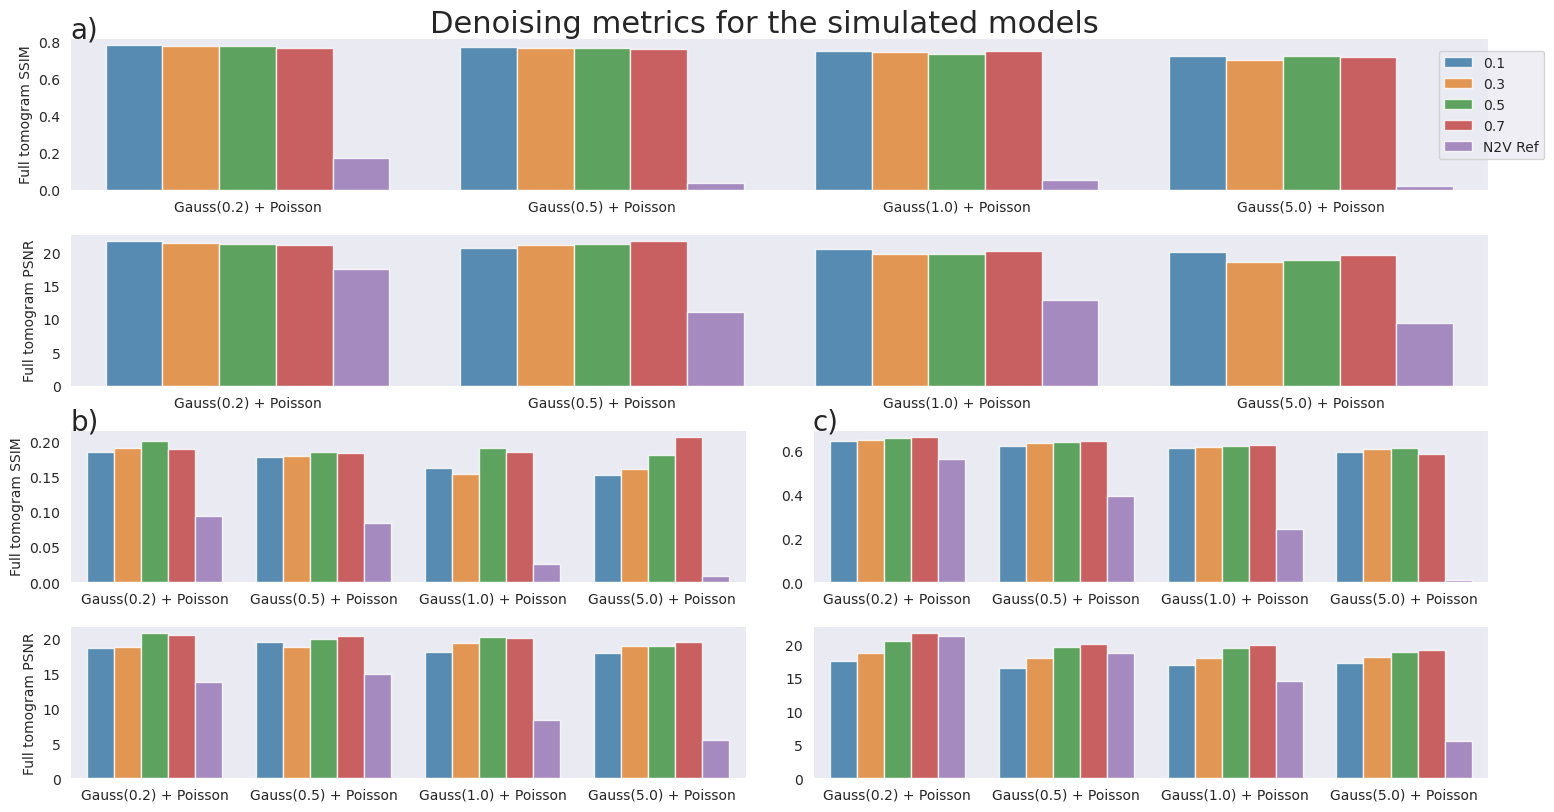

In [92]:
plt.figure(figsize=(15, 8), dpi=100)
grid = plt.GridSpec(4, 2)

ax0 = plt.subplot(grid[0, :])
ax1 = plt.subplot(grid[1, :])
ax2 = plt.subplot(grid[2, 0])
ax3 = plt.subplot(grid[3, 0])
ax4 = plt.subplot(grid[2, 1])
ax5 = plt.subplot(grid[3, 1])

plt.tight_layout()
plt.suptitle('Denoising metrics for the tomoPhantom images', y=1.01, size=22)

axs = [[ax0, ax1], [ax2, ax3], [ax4, ax5]]
ns = ['cell', 'blobs', 'spaceship']

i = 0
for n, ax in zip(ns, axs):
    print(n)
    aux = df[df.tomo_name==n]
    name = aux.tomo_name.values[0]

    sns.barplot(data=aux, hue='p', y='full_tomo_ssim', x='noise_level', ax=ax[0], alpha=0.8)
    ax[0].set_xlabel('')
    ax[0].set_ylabel('Full tomogram SSIM', fontsize=10)
    ax[0].legend(bbox_to_anchor=(0.96, 0.96))
    ax[0].text(0, 1, string.ascii_lowercase[i]+')', transform=ax[0].transAxes, size=20)

    
    sns.barplot(data=aux, hue='p', y='full_tomo_psnr', x='noise_level', ax=ax[1], alpha=0.8)
    ax[1].set_xlabel('')
    ax[1].set_ylabel('Full tomogram PSNR', fontsize=10)
    ax[1].get_legend().remove()
    i+=1
    

ax2.set_xlabel('')
ax2.get_legend().remove()
ax2.set_ylabel('Full tomogram SSIM', fontsize=10)

ax3.set_xlabel('')
ax3.set_ylabel('Full tomogram PSNR', fontsize=10)

ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.get_legend().remove()

ax5.set_xlabel('')
ax5.set_ylabel('')



# Metrics table from fourierTripleMask experiments

In [3]:
tomo_list = [
    'tomoPhantom_model8_noisyGaussPoissVL',
    'tomoPhantom_model8_noisyGaussPoissL',
    'tomoPhantom_model8_noisyGaussPoissM',
    'tomoPhantom_model8_noisyGaussPoissH',
    'tomoPhantom_model14_noisyGaussPoissVL',
    'tomoPhantom_model14_noisyGaussPoissL',
    'tomoPhantom_model14_noisyGaussPoissM',
    'tomoPhantom_model14_noisyGaussPoissH',
    'tomoPhantom_model16_noisyGaussPoissVL',
    'tomoPhantom_model16_noisyGaussPoissL',
    'tomoPhantom_model16_noisyGaussPoissM',
    'tomoPhantom_model16_noisyGaussPoissH'
            ]

data_log = []

for tomo in tqdm(tomo_list):
    logdir = 'data/S2SDenoising/model_logs/%s/fourierTripleMask_comparison/' %tomo
    logdir = os.path.join(PARENT_PATH, logdir)

    _data_log = logdir_to_dataframe(logdir, clip_values=True)
    data_log.append(_data_log)

data_log = pd.concat(data_log)
data_log = data_log.reset_index().drop('index', 1)
data_log.head()

100%|███████████████████████████████████████| 12/12 [00:45<00:00,  3.80s/it]


model    version                    dataset  \
0  fourierTripleMask_comparison  version_0  singleCET_FourierDataset    
1  fourierTripleMask_comparison  version_1  singleCET_FourierDataset    
2  fourierTripleMask_comparison  version_0  singleCET_FourierDataset    
3  fourierTripleMask_comparison  version_1  singleCET_FourierDataset    
4  fourierTripleMask_comparison  version_0  singleCET_FourierDataset    

  TV_alpha                         Version_comment     transform  \
0        0  p0.1, Vmask_p0.5, volFact8, dropout0.7  {'p': '0.5'}   
1        0  p0.1, Vmask_p0.5, volFact8, dropout0.8  {'p': '0.5'}   
2        0  p0.1, Vmask_p0.5, volFact8, dropout0.7  {'p': '0.5'}   
3        0  p0.1, Vmask_p0.5, volFact8, dropout0.8  {'p': '0.5'}   
4        0  p0.1, Vmask_p0.5, volFact8, dropout0.7  {'p': '0.5'}   

   full_tomo_psnr  full_tomo_ssim  baseline_psnr  baseline_ssim  \
0          14.713           0.134          7.551          0.036   
1          14.408           0.139          7.551          0.036   
2          11.502           0.091          6.710          0.025   
3          12.453           0.101          6.710          0.025   
4           9.310           0.070          6.379          0.019   

                                           tomo_path  \
0  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
1  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
2  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
3  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
4  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   

                                        gt_tomo_path use_deconv_as_target  \
0  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
1  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
2  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
3  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
4  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   

  predict_simRecon use_deconv_data    p  n2v_psnr  n2v_ssim  \
0             null           false  0.7    17.398     0.119   
1             null           false  0.8    17.398     0.119   
2             null           false  0.7    14.857     0.084   
3             null           false  0.8    14.857     0.084   
4             null           false  0.7     8.316     0.026   

   baseline_psnr_best  baseline_ssim_best  ssim_vs_baseline  \
0               7.551               0.036           275.022   
1               7.551               0.036           288.548   
2               6.710               0.025           262.849   
3               6.710               0.025           302.687   
4               6.379               0.019           264.657   

   n2v_ssim_vs_baseline  psnr_vs_baseline  n2v_psnr_vs_baseline  \
0               231.562            94.842               130.399   
1               231.562            90.803               130.399   
2               233.595            71.420               121.418   
3               233.595            85.603               121.418   
4                36.974            45.955                30.370   

            noise_level tomo_name  \
0  Gauss(0.2) + Poisson     blobs   
1  Gauss(0.2) + Poisson     blobs   
2  Gauss(0.5) + Poisson     blobs   
3  Gauss(0.5) + Poisson     blobs   
4  Gauss(1.0) + Poisson     blobs   

                                           pred_path  
0  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
1  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
2  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
3  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
4  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...

In [4]:
df = data_log.groupby(['tomo_name', 'noise_level', 'p'])['full_tomo_ssim', 'full_tomo_psnr'].mean().reset_index()

df2 = data_log.groupby(['tomo_name', 'noise_level'])['n2v_ssim', 'n2v_psnr'].mean().reset_index()
df2['p'] = 'N2V Ref'
df2 = df2[['tomo_name', 'noise_level', 'p', 'n2v_ssim', 'n2v_psnr']]
df2.columns = ['tomo_name', 'noise_level', 'p', 'full_tomo_ssim', 'full_tomo_psnr']

df = pd.concat([df, df2])
df.head()

tomo_name           noise_level    p  full_tomo_ssim  full_tomo_psnr
0     blobs  Gauss(0.2) + Poisson  0.7           0.134          14.713
1     blobs  Gauss(0.2) + Poisson  0.8           0.139          14.408
2     blobs  Gauss(0.5) + Poisson  0.7           0.091          11.502
3     blobs  Gauss(0.5) + Poisson  0.8           0.101          12.453
4     blobs  Gauss(1.0) + Poisson  0.7           0.070           9.310

cell
blobs
spaceship


Text(775.3131313131312, 0.5, '')

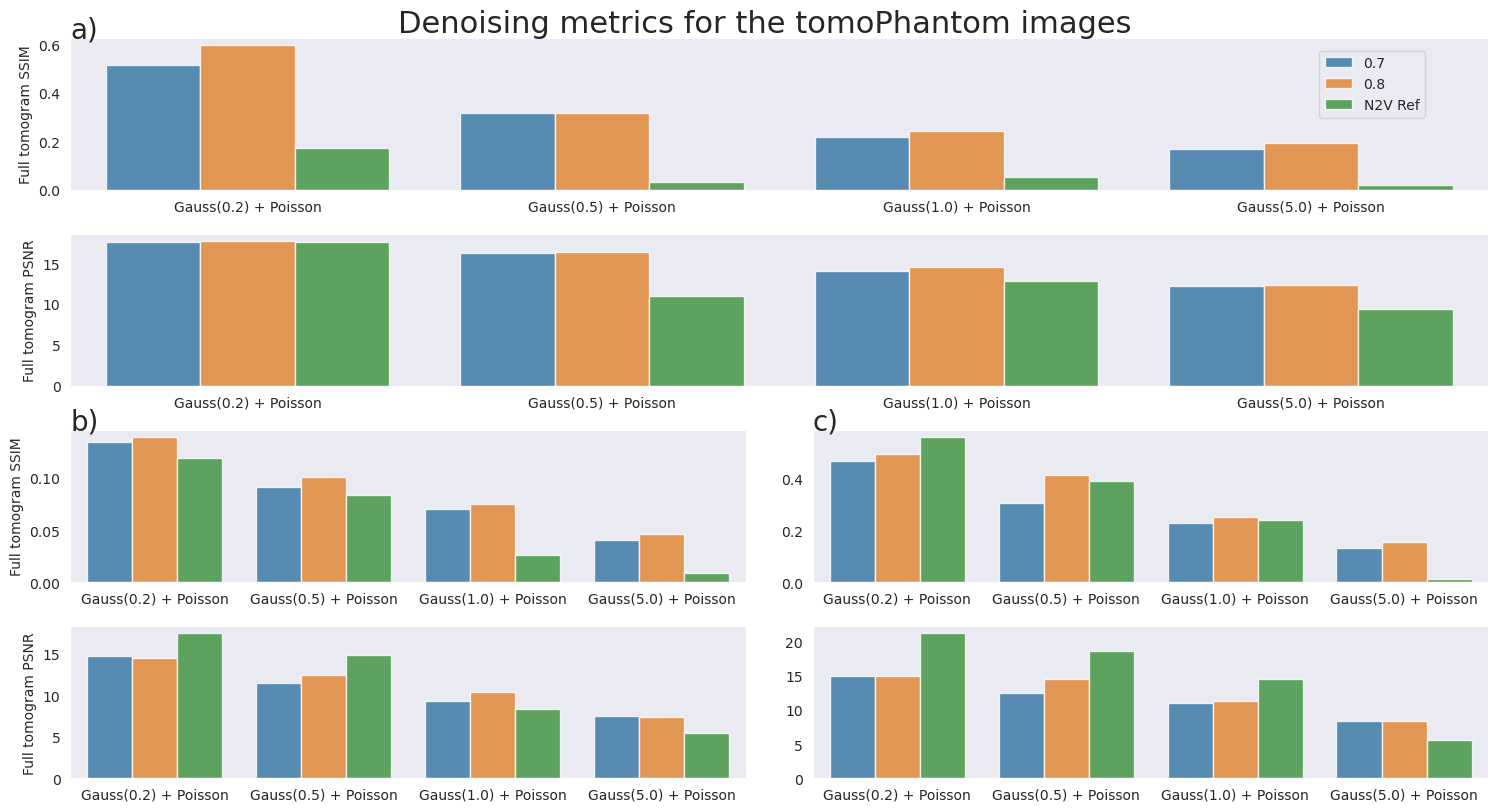

In [5]:
plt.figure(figsize=(15, 8), dpi=100)
grid = plt.GridSpec(4, 2)

ax0 = plt.subplot(grid[0, :])
ax1 = plt.subplot(grid[1, :])
ax2 = plt.subplot(grid[2, 0])
ax3 = plt.subplot(grid[3, 0])
ax4 = plt.subplot(grid[2, 1])
ax5 = plt.subplot(grid[3, 1])

plt.tight_layout()
plt.suptitle('Denoising metrics for the tomoPhantom images', y=1.01, size=22)

axs = [[ax0, ax1], [ax2, ax3], [ax4, ax5]]
ns = ['cell', 'blobs', 'spaceship']

i = 0
for n, ax in zip(ns, axs):
    print(n)
    aux = df[df.tomo_name==n]
    name = aux.tomo_name.values[0]

    sns.barplot(data=aux, hue='p', y='full_tomo_ssim', x='noise_level', ax=ax[0], alpha=0.8)
    ax[0].set_xlabel('')
    ax[0].set_ylabel('Full tomogram SSIM', fontsize=10)
    ax[0].legend(bbox_to_anchor=(0.96, 0.96))
    ax[0].text(0, 1, string.ascii_lowercase[i]+')', transform=ax[0].transAxes, size=20)

    
    sns.barplot(data=aux, hue='p', y='full_tomo_psnr', x='noise_level', ax=ax[1], alpha=0.8)
    ax[1].set_xlabel('')
    ax[1].set_ylabel('Full tomogram PSNR', fontsize=10)
    ax[1].get_legend().remove()
    i+=1
    

ax2.set_xlabel('')
ax2.get_legend().remove()
ax2.set_ylabel('Full tomogram SSIM', fontsize=10)

ax3.set_xlabel('')
ax3.set_ylabel('Full tomogram PSNR', fontsize=10)

ax4.set_xlabel('')
ax4.set_ylabel('')
ax4.get_legend().remove()

ax5.set_xlabel('')
ax5.set_ylabel('')



# Central slice denoising comparison

In [24]:
model_no = 8

tomo_list = [
    'tomoPhantom_model%i_noisyGaussPoissVL' %model_no,
    'tomoPhantom_model%i_noisyGaussPoissL' %model_no,
    'tomoPhantom_model%i_noisyGaussPoissM' %model_no,
    'tomoPhantom_model%i_noisyGaussPoissH' %model_no
]
exp_names = ["realBernoulli_dropoutLevel_comparison", "fourierTripleMask_comparison"]

data_log = []

for exp_name in exp_names:
    for tomo in tomo_list:

        logdir = 'data/S2SDenoising/model_logs/%s/%s/' %(tomo, exp_name)
        logdir = os.path.join(PARENT_PATH, logdir)

        _data_log = logdir_to_dataframe(logdir, clip_values=True)
        data_log.append(_data_log)

data_log = pd.concat(data_log)
data_log = data_log.reset_index().drop('index', 1)
data_log.head()

model    version             dataset  \
0  realBernoulli_dropoutLevel_comparison  version_0  singleCET_dataset    
1  realBernoulli_dropoutLevel_comparison  version_1  singleCET_dataset    
2  realBernoulli_dropoutLevel_comparison  version_2  singleCET_dataset    
3  realBernoulli_dropoutLevel_comparison  version_3  singleCET_dataset    
4  realBernoulli_dropoutLevel_comparison  version_0  singleCET_dataset    

  TV_alpha Version_comment     transform  full_tomo_psnr  full_tomo_ssim  \
0        0       Bernoulli  {'p': '0.5'}          18.575           0.184   
1        0       Bernoulli  {'p': '0.5'}          18.766           0.190   
2        0       Bernoulli  {'p': '0.5'}          20.658           0.201   
3        0       Bernoulli  {'p': '0.5'}          20.389           0.189   
4        0       Bernoulli  {'p': '0.5'}          19.466           0.178   

   baseline_psnr  baseline_ssim  \
0          7.551          0.036   
1          7.551          0.036   
2          7.551          0.036   
3          7.551          0.036   
4          6.710          0.025   

                                           tomo_path  \
0  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
1  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
2  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
3  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
4  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   

                                        gt_tomo_path use_deconv_as_target  \
0  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
1  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
2  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
3  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
4  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   

  predict_simRecon use_deconv_data    p  n2v_psnr  n2v_ssim  \
0             null           false  0.1    17.398     0.119   
1             null           false  0.3    17.398     0.119   
2             null           false  0.5    17.398     0.119   
3             null           false  0.7    17.398     0.119   
4             null           false  0.1    14.857     0.084   

   baseline_psnr_best  baseline_ssim_best  ssim_vs_baseline  \
0               7.551               0.036           414.185   
1               7.551               0.036           430.447   
2               7.551               0.036           461.277   
3               7.551               0.036           428.031   
4               6.710               0.025           606.609   

   n2v_ssim_vs_baseline  psnr_vs_baseline  n2v_psnr_vs_baseline  \
0               231.562           145.986               130.399   
1               231.562           148.527               130.399   
2               231.562           173.578               130.399   
3               231.562           170.021               130.399   
4               233.595           190.119               121.418   

            noise_level tomo_name  \
0  Gauss(0.2) + Poisson     blobs   
1  Gauss(0.2) + Poisson     blobs   
2  Gauss(0.2) + Poisson     blobs   
3  Gauss(0.2) + Poisson     blobs   
4  Gauss(0.5) + Poisson     blobs   

                                           pred_path  
0  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
1  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
2  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
3  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...  
4  /home/ubuntu/Thesis/data/S2SDenoising/model_lo...

index                                  model    version  \
0      0  realBernoulli_dropoutLevel_comparison  version_0   
1      4  realBernoulli_dropoutLevel_comparison  version_0   
2      8  realBernoulli_dropoutLevel_comparison  version_0   
3     12  realBernoulli_dropoutLevel_comparison  version_0   
4     17           fourierTripleMask_comparison  version_1   
5     19           fourierTripleMask_comparison  version_1   
6     21           fourierTripleMask_comparison  version_1   
7     23           fourierTripleMask_comparison  version_1   

                     dataset TV_alpha                         Version_comment  \
0         singleCET_dataset         0                               Bernoulli   
1         singleCET_dataset         0                               Bernoulli   
2         singleCET_dataset         0                               Bernoulli   
3         singleCET_dataset         0                               Bernoulli   
4  singleCET_FourierDataset         0  p0.1, Vmask_p0.5, volFact8, dropout0.8   
5  singleCET_FourierDataset         0  p0.1, Vmask_p0.5, volFact8, dropout0.8   
6  singleCET_FourierDataset         0  p0.1, Vmask_p0.5, volFact8, dropout0.8   
7  singleCET_FourierDataset         0  p0.1, Vmask_p0.5, volFact8, dropout0.8   

      transform  full_tomo_psnr  full_tomo_ssim  baseline_psnr  baseline_ssim  \
0  {'p': '0.5'}          18.575           0.184          7.551          0.036   
1  {'p': '0.5'}          19.466           0.178          6.710          0.025   
2  {'p': '0.5'}          18.031           0.162          6.379          0.019   
3  {'p': '0.5'}          17.807           0.152          6.053          0.011   
4  {'p': '0.5'}          14.408           0.139          7.551          0.036   
5  {'p': '0.5'}          12.453           0.101          6.710          0.025   
6  {'p': '0.5'}          10.323           0.075          6.379          0.019   
7  {'p': '0.5'}           7.382           0.046          6.053          0.011   

                                           tomo_path  \
0  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
1  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
2  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
3  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
4  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
5  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
6  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   
7  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...   

                                        gt_tomo_path use_deconv_as_target  \
0  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
1  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
2  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
3  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
4  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
5  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
6  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   
7  /home/ubuntu/Thesis/data/S2SDenoising/dummy_to...                 null   

  predict_simRecon use_deconv_data    p  n2v_psnr  n2v_ssim  \
0             null           false  0.1    17.398     0.119   
1             null           false  0.1    14.857     0.084   
2             null           false  0.1     8.316     0.026   
3             null           false  0.1     5.403     0.009   
4             null           false  0.8    17.398     0.119   
5             null           false  0.8    14.857     0.084   
6             null           false  0.8     8.316     0.026   
7             null           false  0.8     5.403     0.009   

   baseline_psnr_best  baseline_ssim_best  ssim_vs_baseline  \
0               7.551               0.036           414.185   
1               6.710               0.025           606.609   
2               6.379       

Text(0.93, 0.4, 'Fourier')

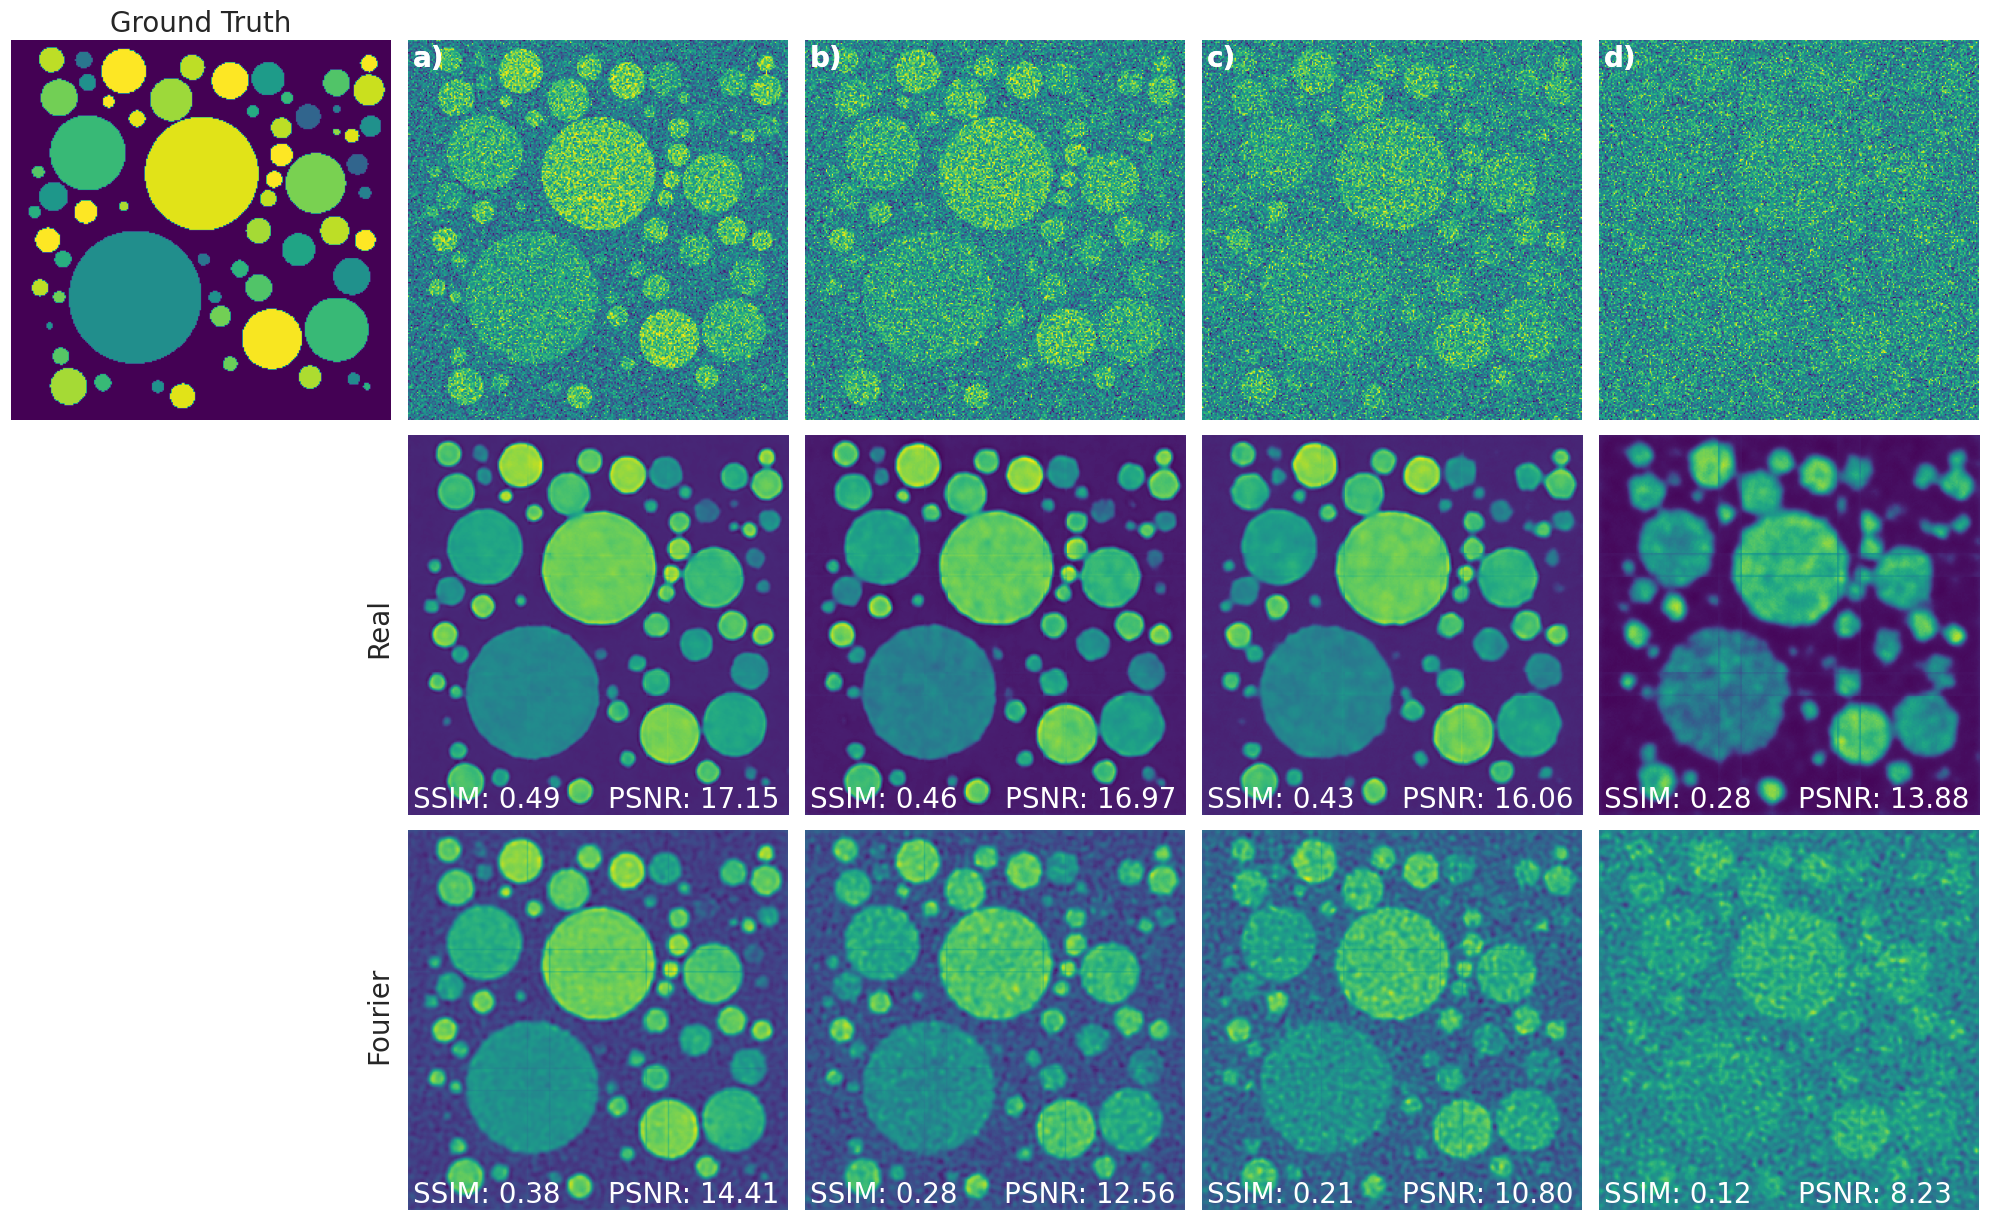

In [26]:
cond1 = (data_log.model=='realBernoulli_dropoutLevel_comparison') & (data_log.version=='version_0')
cond2 = (data_log.model=='fourierTripleMask_comparison') & (data_log.version=='version_1') # almost all versions have best scores with more dropout

aux_df = data_log[cond1 | cond2]

idx = aux_df.groupby(['model', 'noise_level'])['full_tomo_ssim'].transform(max) == aux_df['full_tomo_ssim']

df = aux_df[idx].reset_index()

display(df)

fig, ax = plt.subplots(3, 5, figsize=(20, 12), dpi=100)
list(map(lambda axi: axi.set_axis_off(), ax.ravel()))
plt.tight_layout()

for i, row in df.iterrows():
    gt = read_array(row.gt_tomo_path)
    gt = standardize(clip(gt))
    gt = scale(gt)
    noisy = read_array(row.tomo_path)
    noisy = standardize(clip(noisy))
    noisy = scale(noisy)
    denoised = read_array(row.pred_path)
    denoised = scale(denoised)
    
    zidx = len(gt)//2
    
    # print(row.pred_path, '\n')
    
    ax[0][0].imshow(gt[zidx], vmin=0, vmax=1)
    ax[0][0].set_title('Ground Truth', size=20)
    
    i = i%4
    
    ax_noisy = ax[0][i+1]
    if row.model=='fourierTripleMask_comparison':
        ax_denoised = ax[2][i+1]
    else:
        ax_denoised = ax[1][i+1]
        
    ax_noisy.imshow(noisy[zidx], vmin=0, vmax=1)
    ax_denoised.imshow(denoised[zidx], vmin=0, vmax=1)
    
    _ssim = ssim(torch.tensor(gt[zidx]).unsqueeze(0).unsqueeze(0),
                 torch.tensor(denoised[zidx]).unsqueeze(0).unsqueeze(0), 
                 data_range=1)
    
    _psnr = peak_signal_noise_ratio(torch.tensor(gt[zidx]).unsqueeze(0).unsqueeze(0),
                 torch.tensor(denoised[zidx]).unsqueeze(0).unsqueeze(0), 
                 data_range=1)
    
    ax_noisy.text(0.0125, 0.93, string.ascii_lowercase[i]+')', transform=ax_noisy.transAxes, size=20, weight='bold', color='white')
    ax_denoised.text(0.0125, 0.02, 'SSIM: %.02f' %float(_ssim), transform=ax_denoised.transAxes, size=20, color='white')
    ax_denoised.text(0.5+2*0.0125, 0.02, 'PSNR: %.02f' %float(_psnr), transform=ax_denoised.transAxes, size=20, color='white')
    
ax[1][0].text(0.93,0.43, "Real", rotation='vertical', size=20)
ax[2][0].text(0.93,0.4, "Fourier", rotation='vertical', size=20)